In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
df = pd.read_csv('amazon_data.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,Product_ID,product,price_dollars,star_ratings,total_ratings,url,category,Customer_1_ID,Customer_1_Star_Rating,Customer_1_Comment,Customer_1_buying_influence,Customer_2_ID,Customer_2_Star_Rating,Customer_2_Comment,Customer_2_buying_influence,Customer_3_ID,Customer_3_Star_Rating,Customer_3_Comment,Customer_3_buying_influence,Customer_4_ID,Customer_4_Star_Rating,Customer_4_Comment,Customer_4_buying_influence,Customer_5_ID,Customer_5_Star_Rating,Customer_5_Comment,Customer_5_buying_influence,Top_Positive_Review_Cust_ID,Top_Positive_Review_Cust_Name,Top_Positive_Review_Cust_Influenced,Top_Positive_Review_Cust_Comment,Top_Positive_Review_Cust_Comment_Title,Top_Positive_Review_Cust_Date,Top_Positive_Review_Cust_Star_Rating,Critical_Review_Cust_ID,Critical_Review_Cust_Name,Critical_Review_Cust_Influenced,Critical_Review_Cust_Comment,Critical_Review_Cust_Comment_Title,Critical_Review_Cust_Date,Critical_Review_Cust_Star_Rating
0,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,https://www.amazon.com/product-reviews/B0BZ9XN...,Smartphones,R1B3EGMQP3U9HM,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,ROSGYBSL94XZ5,4.0,Poor man's iPhone,7.0,R2GJ7L8RJJR7FV,4.0,"Great overall, especially call screening, thou...",15.0,R1ARDK7GYTSU3X,4.0,Surprisingly nice phone.,8.0,R2M2XB8HL58NXX,2.0,"Horrific battery life, be cautious before you buy",82.0,R1B3EGMQP3U9HM,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,R2M2XB8HL58NXX,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,B0BLP2Y34S,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,https://www.amazon.com/product-reviews/B0BLP2Y...,Smartphones,R2LC7ZJVNFGV1I,5.0,Worlds better than anything from Apple.,1.0,R1ZFOC0PC92CAR,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,RNB2E4X75AW55,5.0,Love it!,0.0,R19Y94YPF7URU0,5.0,The best cell phone,5.0,R2OD66BML50DDB,5.0,Best phone period,3.0,R2LC7ZJVNFGV1I,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,RNG0BCVBELY6Y,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0
2,B0BSLRXF1H,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",349.99,4.4,196,https://www.amazon.com/product-reviews/B0BSLRX...,Smartphones,R1NBWDYCN898NM,5.0,Impressed,3.0,R36WW3GRJEAPZ8,4.0,Long battery life,25.0,R3IE0NDNZZXBN9,5.0,Good phone,7.0,R1DCCD4MQU12LM,5.0,Great Battery Life and Customization,20.0,R2OJ9WHPMX469I,4.0,If You Get SIM 1 Not allowed,9.0,R1NBWDYCN898NM,Smitty,3.0,This phone is amazing. This unlocked phone wo...,Impressed,2023-09-26,5.0,R1QBO18YMKGS6M,Shiane Monday,3.0,My old phone was the galaxy S10e. Very basic p...,It's okay.,2023-08-17,3.0


### Data Assessment and Preprocessing

In [3]:
# Check data dimensionality
rows, columns = df.shape
print('Number of rows:', rows)
print('Number of columns:', columns)

Number of rows: 1508
Number of columns: 41


In [4]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Product_ID                              1508 non-null   object 
 1   product                                 1508 non-null   object 
 2   price_dollars                           1508 non-null   float64
 3   star_ratings                            1508 non-null   float64
 4   total_ratings                           1508 non-null   int64  
 5   url                                     1508 non-null   object 
 6   category                                1508 non-null   object 
 7   Customer_1_ID                           1508 non-null   object 
 8   Customer_1_Star_Rating                  1508 non-null   float64
 9   Customer_1_Comment                      1508 non-null   object 
 10  Customer_1_buying_influence             1508 non-null   floa

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check for columns with null values
null_values = df.isnull().sum()
null_values[null_values > 0]

Customer_2_Star_Rating               55
Customer_2_buying_influence          55
Customer_3_Star_Rating              102
Customer_3_buying_influence         102
Customer_4_Star_Rating              135
Customer_4_buying_influence         135
Customer_5_Star_Rating              154
Customer_5_buying_influence         154
Top_Positive_Review_Cust_Comment      1
Critical_Review_Cust_Comment          1
dtype: int64

In [7]:
# Filling null values in numerical columns
numerical_col = ['Customer_2_Star_Rating', 'Customer_2_buying_influence', 'Customer_3_Star_Rating', 'Customer_3_buying_influence',
               'Customer_4_Star_Rating', 'Customer_4_buying_influence', 'Customer_5_Star_Rating', 'Customer_5_buying_influence']

# Loop to impute the median value in place of null values
for column in numerical_col:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)       

In [8]:
# Categorical columns with null values
cat_null = ['Top_Positive_Review_Cust_Comment', 'Critical_Review_Cust_Comment']

# A loop to drop rows with null values in each categorical column
for column in cat_null:
    df.dropna(subset=[column], inplace=True)

In [9]:
# Count rows where 'Critical_Review_Cust_Date' equals '1677-09-21'
(df['Critical_Review_Cust_Date'] == '1677-09-21').sum()

234

In [10]:
# Filter out rows with the date '1677-09-21' in the 'Critical_Review_Cust_Date' column
df = df[df['Critical_Review_Cust_Date'] != '1677-09-21']

In [11]:
# List of date columns to be parsed
date_columns = ['Top_Positive_Review_Cust_Date', 'Critical_Review_Cust_Date']

# Loop through each date column and parse it to datetime
for date in date_columns:
    df[date] = pd.to_datetime(df[date])

In [12]:
# Create a copy of the DataFrame for exploratory data analysis
df_eda = df.copy()

# Display the first 2 rows of the copied DataFrame
df_eda.head(2)

,Product_ID,product,price_dollars,star_ratings,total_ratings,url,category,Customer_1_ID,Customer_1_Star_Rating,Customer_1_Comment,Customer_1_buying_influence,Customer_2_ID,Customer_2_Star_Rating,Customer_2_Comment,Customer_2_buying_influence,Customer_3_ID,Customer_3_Star_Rating,Customer_3_Comment,Customer_3_buying_influence,Customer_4_ID,Customer_4_Star_Rating,Customer_4_Comment,Customer_4_buying_influence,Customer_5_ID,Customer_5_Star_Rating,Customer_5_Comment,Customer_5_buying_influence,Top_Positive_Review_Cust_ID,Top_Positive_Review_Cust_Name,Top_Positive_Review_Cust_Influenced,Top_Positive_Review_Cust_Comment,Top_Positive_Review_Cust_Comment_Title,Top_Positive_Review_Cust_Date,Top_Positive_Review_Cust_Star_Rating,Critical_Review_Cust_ID,Critical_Review_Cust_Name,Critical_Review_Cust_Influenced,Critical_Review_Cust_Comment,Critical_Review_Cust_Comment_Title,Critical_Review_Cust_Date,Critical_Review_Cust_Star_Rating
0,B0BZ9XNBRB,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,https://www.amazon.com/product-reviews/B0BZ9XN...,Smartphones,R1B3EGMQP3U9HM,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,ROSGYBSL94XZ5,4.0,Poor man's iPhone,7.0,R2GJ7L8RJJR7FV,4.0,"Great overall, especially call screening, thou...",15.0,R1ARDK7GYTSU3X,4.0,Surprisingly nice phone.,8.0,R2M2XB8HL58NXX,2.0,"Horrific battery life, be cautious before you buy",82.0,R1B3EGMQP3U9HM,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,R2M2XB8HL58NXX,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,B0BLP2Y34S,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,https://www.amazon.com/product-reviews/B0BLP2Y...,Smartphones,R2LC7ZJVNFGV1I,5.0,Worlds better than anything from Apple.,1.0,R1ZFOC0PC92CAR,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,RNB2E4X75AW55,5.0,Love it!,0.0,R19Y94YPF7URU0,5.0,The best cell phone,5.0,R2OD66BML50DDB,5.0,Best phone period,3.0,R2LC7ZJVNFGV1I,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,RNG0BCVBELY6Y,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0


In [13]:
# List of columns to drop before EDA
columns_drop = ['Product_ID', 'url', 'Customer_1_ID', 'Customer_2_ID', 'Customer_3_ID', 'Customer_4_ID', 'Customer_5_ID', 
                'Top_Positive_Review_Cust_ID', 'Critical_Review_Cust_ID']

# Looping through dataframe to drop above columns
for col in columns_drop:
    df_eda.drop(col, axis=1, inplace=True)

In [14]:
# Renaming columns for better readability
df_eda.rename(columns={'price_dollars': 'price', 'Customer_1_Star_Rating': 'Rating_1', 'Customer_1_Comment': 'Comment_1',
                      'Customer_1_buying_influence': 'Influence_1', 'Customer_2_Star_Rating': 'Rating_2', 'Customer_2_Comment': 'Comment_2',
                      'Customer_2_buying_influence': 'Influence_2', 'Customer_3_Star_Rating': 'Rating_3', 'Customer_3_Comment': 'Comment_3',
                       'Customer_3_buying_influence': 'Influence_3', 'Customer_4_Star_Rating': 'Rating_4', 'Customer_4_Comment': 'Comment_4',
                      'Customer_4_buying_influence': 'Influence_4', 'Customer_5_Star_Rating': 'Rating_5', 'Customer_5_Comment': 'Comment_5',
                      'Customer_5_buying_influence': 'Influence_5', 'Top_Positive_Review_Cust_Name': 'TPR_Cust_Name',
                      'Top_Positive_Review_Cust_Influenced': 'TPR_Influence', 'Top_Positive_Review_Cust_Comment' : 'TPR_Comment',
                      'Top_Positive_Review_Cust_Comment_Title' : 'TPR_Title', 'Top_Positive_Review_Cust_Date' : 'TPR_Date',
                      'Top_Positive_Review_Cust_Star_Rating' : 'TPR_Rating', 'Critical_Review_Cust_Name': 'CR_Cust_Name',
                      'Critical_Review_Cust_Influenced': 'CR_Influence', 'Critical_Review_Cust_Comment' : 'CR_Comment',
                      'Critical_Review_Cust_Comment_Title' : 'CR_Title', 'Critical_Review_Cust_Date' : 'CR_Date',
                      'Critical_Review_Cust_Star_Rating' : 'CR_Rating'}, inplace=True)

# Display the first 2 rows of the DataFrame df_eda
df_eda.head(2)

,product,price,star_ratings,total_ratings,category,Rating_1,Comment_1,Influence_1,Rating_2,Comment_2,Influence_2,Rating_3,Comment_3,Influence_3,Rating_4,Comment_4,Influence_4,Rating_5,Comment_5,Influence_5,TPR_Cust_Name,TPR_Influence,TPR_Comment,TPR_Title,TPR_Date,TPR_Rating,CR_Cust_Name,CR_Influence,CR_Comment,CR_Title,CR_Date,CR_Rating
0,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,Smartphones,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,4.0,Poor man's iPhone,7.0,4.0,"Great overall, especially call screening, thou...",15.0,4.0,Surprisingly nice phone.,8.0,2.0,"Horrific battery life, be cautious before you buy",82.0,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,Smartphones,5.0,Worlds better than anything from Apple.,1.0,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,5.0,Love it!,0.0,5.0,The best cell phone,5.0,5.0,Best phone period,3.0,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0


### Exploratory Data Analysis (EDA)

<Axes: xlabel='price'>

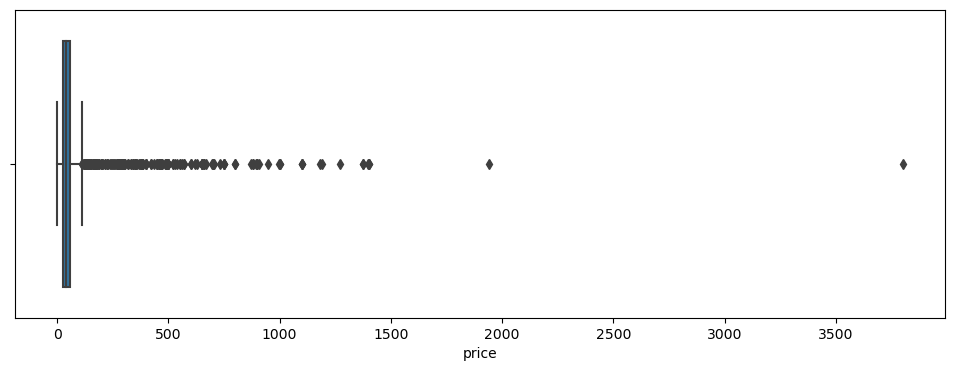

In [15]:
# Visualizing the distribution of price
plt.figure(figsize=(12,4))
sns.boxplot(x=df_eda['price'])

<Axes: xlabel='star_ratings', ylabel='Count'>

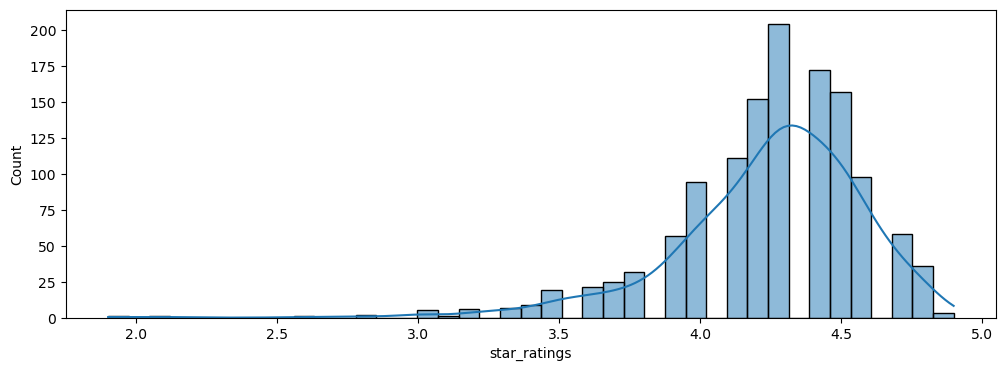

In [16]:
# Star rating distribution
plt.figure(figsize=(12,4))
sns.histplot(x=df_eda['star_ratings'], kde=True)

<Axes: xlabel='category', ylabel='count'>

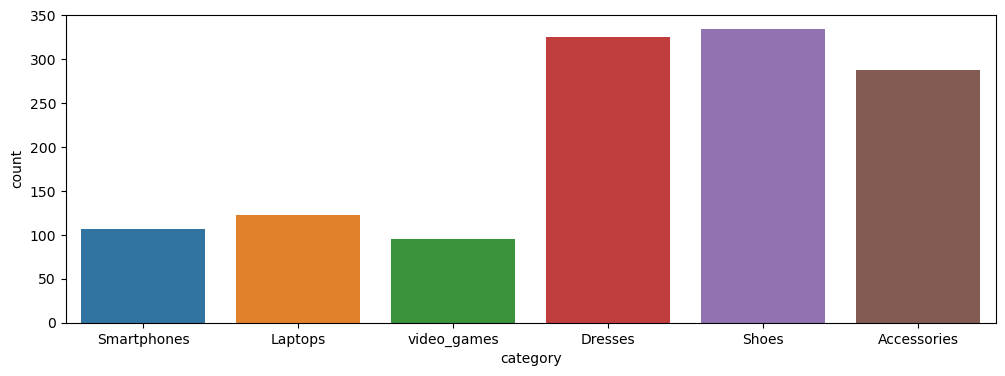

In [17]:
# Customer purchase across categories
plt.figure(figsize=(12,4))
sns.countplot(data=df_eda, x='category')

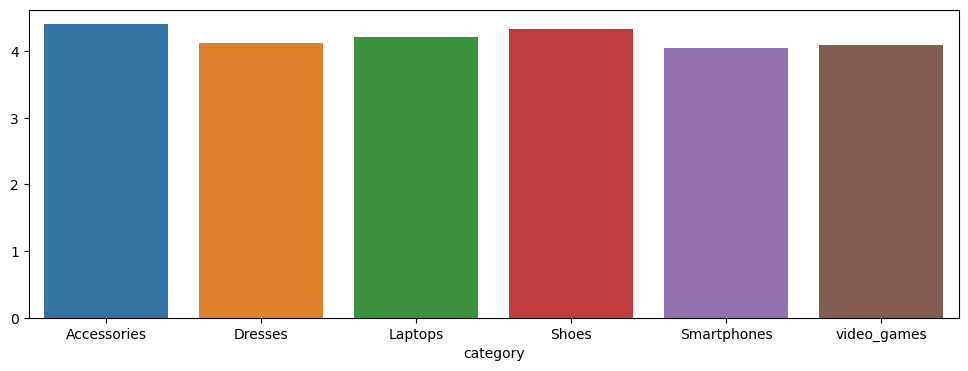

In [18]:
plt.figure(figsize=(12, 4))
average_ratings = df_eda.groupby('category')['star_ratings'].mean()
sns.barplot(x=average_ratings.index, y=average_ratings.values);

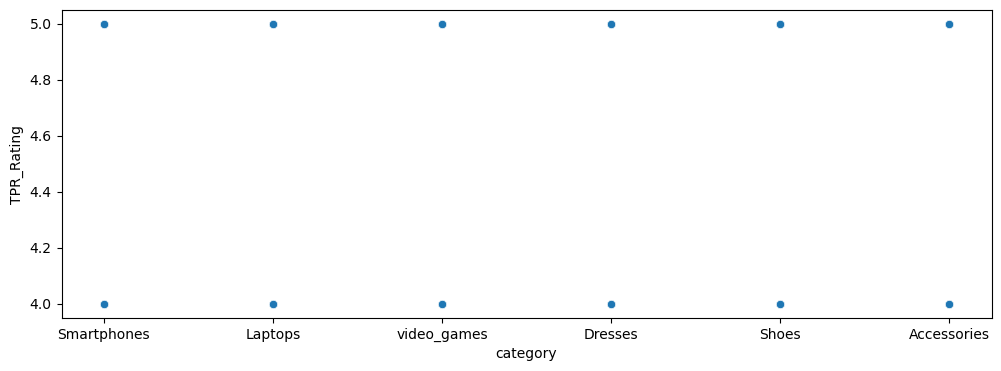

In [19]:
# Visualize Top Positive Rating across the Categories
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_eda, x='category', y='TPR_Rating');

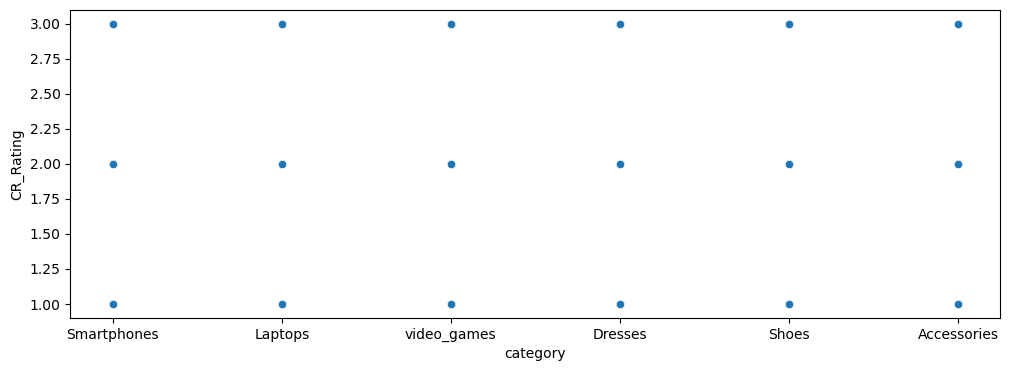

In [20]:
# Visualize Critical Ratings across the Categories
plt.figure(figsize=(12,4))
sns.scatterplot(data=df_eda, x='category', y='CR_Rating');

### Natural Language Processing (NLP)

In [21]:
df_eda.head(3)

,product,price,star_ratings,total_ratings,category,Rating_1,Comment_1,Influence_1,Rating_2,Comment_2,Influence_2,Rating_3,Comment_3,Influence_3,Rating_4,Comment_4,Influence_4,Rating_5,Comment_5,Influence_5,TPR_Cust_Name,TPR_Influence,TPR_Comment,TPR_Title,TPR_Date,TPR_Rating,CR_Cust_Name,CR_Influence,CR_Comment,CR_Title,CR_Date,CR_Rating
0,Google Pixel 7a - Unlocked Android Cell Phone ...,499.00,4.2,546,Smartphones,5.0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,37.0,4.0,Poor man's iPhone,7.0,4.0,"Great overall, especially call screening, thou...",15.0,4.0,Surprisingly nice phone.,8.0,2.0,"Horrific battery life, be cautious before you buy",82.0,Carnelian,37.0,In a world dominated by smartphones with hefty...,Pixel 7a: Unleashes the Pixel Magic at an Affo...,2023-06-15,5.0,Camden,82.0,I'm an android developer; I do a lot of resear...,"Horrific battery life, be cautious before you buy",2023-06-30,2.0
1,"SAMSUNG Galaxy S23 Ultra Cell Phone, Factory U...",1179.99,4.7,370,Smartphones,5.0,Worlds better than anything from Apple.,1.0,5.0,"Amazing Phone also got an error ""Sim 1 Not All...",1.0,5.0,Love it!,0.0,5.0,The best cell phone,5.0,5.0,Best phone period,3.0,Amazon Customer,1.0,"I've never have a phone so quick, smooth, easy...",Worlds better than anything from Apple.,2023-09-21,5.0,dane,5.0,"bought this for my wife, the unboxing experien...",damaged packaging,2023-03-07,3.0
2,"SAMSUNG Galaxy A54 5G A Series Cell Phone, Fac...",349.99,4.4,196,Smartphones,5.0,Impressed,3.0,4.0,Long battery life,25.0,5.0,Good phone,7.0,5.0,Great Battery Life and Customization,20.0,4.0,If You Get SIM 1 Not allowed,9.0,Smitty,3.0,This phone is amazing. This unlocked phone wo...,Impressed,2023-09-26,5.0,Shiane Monday,3.0,My old phone was the galaxy S10e. Very basic p...,It's okay.,2023-08-17,3.0


In [22]:
# Create a dataframe for comment columns for NLP
cat_columns = df_eda[['Comment_1', 'Comment_2', 'Comment_3', 'Comment_4', 'Comment_5']]
cat_columns.head()

,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5
0,Pixel 7a: Unleashes the Pixel Magic at an Affo...,Poor man's iPhone,"Great overall, especially call screening, thou...",Surprisingly nice phone.,"Horrific battery life, be cautious before you buy"
1,Worlds better than anything from Apple.,"Amazing Phone also got an error ""Sim 1 Not All...",Love it!,The best cell phone,Best phone period
2,Impressed,Long battery life,Good phone,Great Battery Life and Customization,If You Get SIM 1 Not allowed
3,"Overall good phone, fast hardware. Mediocre mo...","Under $200, 6GB RAM, 128GB storage, low bloat ...",Better than Samsung,Pretty good phone for the price,Very good phone for the price
4,Great buy for the price update,Good Phone but...,I surprised my husband with this replacement p...,Better than my last phone,Motorola phones are getting more and more comp...


In [23]:
# Lowercase all strings in the dataframe
for col in cat_columns.columns:
    cat_columns[col] = cat_columns[col].str.lower()

# Display the first few rows of the modified dataframe
cat_columns.head()

,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5
0,pixel 7a: unleashes the pixel magic at an affo...,poor man's iphone,"great overall, especially call screening, thou...",surprisingly nice phone.,"horrific battery life, be cautious before you buy"
1,worlds better than anything from apple.,"amazing phone also got an error ""sim 1 not all...",love it!,the best cell phone,best phone period
2,impressed,long battery life,good phone,great battery life and customization,if you get sim 1 not allowed
3,"overall good phone, fast hardware. mediocre mo...","under $200, 6gb ram, 128gb storage, low bloat ...",better than samsung,pretty good phone for the price,very good phone for the price
4,great buy for the price update,good phone but...,i surprised my husband with this replacement p...,better than my last phone,motorola phones are getting more and more comp...


In [24]:
import re

# Iterate through the columns
for col in cat_columns.columns:
    # Apply a lambda function to replace non-alphabetical characters with spaces if the value is a string
    cat_columns[col] = cat_columns[col].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x) if isinstance(x, str) else x)

# Display the first few rows of the modified cat_columns
cat_columns.head()

,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5
0,pixel a unleashes the pixel magic at an affo...,poor man s iphone,great overall especially call screening thou...,surprisingly nice phone,horrific battery life be cautious before you buy
1,worlds better than anything from apple,amazing phone also got an error sim not all...,love it,the best cell phone,best phone period
2,impressed,long battery life,good phone,great battery life and customization,if you get sim not allowed
3,overall good phone fast hardware mediocre mo...,under gb ram gb storage low bloat ...,better than samsung,pretty good phone for the price,very good phone for the price
4,great buy for the price update,good phone but,i surprised my husband with this replacement p...,better than my last phone,motorola phones are getting more and more comp...


In [25]:
# Import Stopwords data
from nltk.corpus import stopwords

# Create a set of english stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to your text column
cat_columns['Comment_1'] = cat_columns['Comment_1'].apply(remove_stopwords)
cat_columns['Comment_2'] = cat_columns['Comment_2'].apply(remove_stopwords)
cat_columns['Comment_3'] = cat_columns['Comment_3'].apply(remove_stopwords)
cat_columns['Comment_4'] = cat_columns['Comment_4'].apply(remove_stopwords)
cat_columns['Comment_5'] = cat_columns['Comment_5'].apply(remove_stopwords)

In [26]:
cat_columns.head(2)

,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5
0,pixel unleashes pixel magic affordable price,poor man iphone,great overall especially call screening though...,surprisingly nice phone,horrific battery life cautious buy
1,worlds better anything apple,amazing phone also got error sim allowed first...,love,best cell phone,best phone period


In [27]:
from nltk.stem.porter import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Stem each cell in the DataFrame
for column in cat_columns.columns:
    cat_columns[column] = cat_columns[column].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

cat_columns.head()

,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5
0,pixel unleash pixel magic afford price,poor man iphon,great overal especi call screen though coupl u...,surprisingli nice phone,horrif batteri life cautiou buy
1,world better anyth appl,amaz phone also got error sim allow first devic,love,best cell phone,best phone period
2,impress,long batteri life,good phone,great batteri life custom,get sim allow
3,overal good phone fast hardwar mediocr moto so...,gb ram gb storag low bloat phone like,better samsung,pretti good phone price,good phone price
4,great buy price updat,good phone,surpris husband replac phone,better last phone,motorola phone get complic full bloatwar


In [28]:
# Create a list to store Comment_1 to Comment_5 after stringing all as one comment
comments = []

# Loop through the dataframe cat_columns to create a string stored the comments list
for row in range(0, len(cat_columns.index)):
    comments.append(' '.join(str(x) for x in cat_columns.iloc[row, 0:6]))
    
# Access the first element in the comments list
comments[0]

'pixel unleash pixel magic afford price poor man iphon great overal especi call screen though coupl unexpect issu surprisingli nice phone horrif batteri life cautiou buy'

In [29]:
# Import library for creating labels for each commnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [30]:
# Define the get_Sentiment function
def get_Sentiment(comments):
    scores = sia.polarity_scores(comments)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# Create a DataFrame from the 'comments' list
comments_df = pd.DataFrame({'Comment': comments})

# Apply the get_Sentiment function to the 'Comment' column of your DataFrame
comments_df['sentiment'] = comments_df['Comment'].apply(get_Sentiment)

In [31]:
# Display the first 5 rows of the 'comments_df' DataFrame with labels
comments_df.head()

,Comment,sentiment
0,pixel unleash pixel magic afford price poor ma...,1
1,world better anyth appl amaz phone also got er...,1
2,impress long batteri life good phone great bat...,1
3,overal good phone fast hardwar mediocr moto so...,1
4,great buy price updat good phone surpris husba...,1


In [32]:
# Import Bag of Words library
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(max_features = 500)

# Fit and transform the comments into a bag of words
bag_of_words = vectorizer.fit_transform(comments)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the bag of words into a DataFrame 'bag' for readability
bag = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
bag.head()

,absolut,accessori,adjust,ador,advertis,afford,almost,alter,amaz,amazon,american,android,anoth,app,arch,area,armour,around,arriv,assort,athlet,away,awesom,babi,back,bad,bag,ballet,bang,barbi,barefoot,basic,batteri,beat,beauti,best,better,bewar,big,bigger,birthday,bit,black,blue,bodi,bonito,book,boot,bought,box,brand,break,broke,broken,buck,budget,buen,buena,bueno,burp,bust,busti,button,buy,buyer,calidad,call,came,camera,card,care,casual,cell,charger,chart,cheap,cheapli,check,chelsea,chest,clark,classi,classic,clip,closet,cloth,color,come,comfi,comfort,compat,compliment,comput,confus,consol,control,cool,cost,costum,could,coupl,cruis,cushion,custom,cut,cute,daili,damag,danc,daughter,day,dc,de,deal,decent,definit,deliveri,describ,descript,design,devic,differ,direct,disappoint,display,doll,done,dress,dri,durabl,duti,ear,easi,easili,eleg,emul,enjoy,enough,es,especi,even,event,ever,everi,everyday,everyth,exact,exactli,excel,excelent,except,expect,expens,extra,extrem,fabric,fabul,fall,fan,fantast,faper,far,fast,fat,favorit,fe,featur,feel,feet,final,find,fine,first,fit,flat,flatter,flimsi,flowi,foot,found,friendli,full,fun,function,galaxi,game,gamer,gb,get,gift,girl,give,glove,go,golf,good,gorgeou,got,granddaught,grandson,great,guest,gusta,half,hand,handheld,hang,hanger,happi,hard,hardwar,hat,hdmi,head,heavi,heel,help,hermoso,high,highli,hike,hold,home,hope,hp,huge,husband,impress,inch,incred,insid,instal,issu,item,jean,job,keep,keyboard,kid,know,la,lace,lack,laptop,larg,larger,last,leather,leg,life,light,lightweight,like,line,littl,live,lo,loafer,long,longer,look,loos,lot,love,low,machin,made,make,man,mani,match,materi,medium,meet,meh,memori,men,mid,miss,money,month,much,must,muy,name,narrow,neat,need,never,new,nice,night,non,nostalg,noth,obsess,ok,okay,old,one,open,option,order,organ,otherwis,outfit,outstand,overal,pack,pad,pair,pant,para,part,pattern,pay,pc,peopl,perfect,perfectli,perform,person,phone,photo,picklebal,pictur,piec,pink,pixel,play,pleas,pleasantli,plu,pocket,point,poor,portabl,power,pretti,price,problem,product,producto,purchas,purpl,purpos,put,qualiti,quick,quit,ram,read,real,realli,reason,recommend,red,regular,retro,return,review,right,room,roomi,run,samsung,satisfi,save,saver,school,screen,second,see,seem,seller,seri,servic,set,sexi,sharp,sheer,ship,shirt,shoe,short,show,shown,side,sim,simpl,size,skirt,sleek,sleev,slight,slightli,slim,slip,slipper,slow,small,smaller,smart,smartphon,sneaker,snug,sock,soft,sole,solid,somewhat,son,sound,space,sport,star,state,still,stop,storag,strap,stretchi,student,stun,sturdi,style,stylish,summer,super,support,sure,surpris,surprisingli,svnke,sweater,take,tall,teen,terribl,thick,thin,thing,though,thought,tight,time,toe,togeth,top,touch,toy,traction,travel,tri,true,two,un,updat,us,use,valu,varieti,verizon,versatil,version,waist,wait,walk,want,warm,warranti,wash,water,waterproof,way,wear,wed,week,weight,weird,well,white,wide,wife,window,wish,women,wonder,work,workout,worth,would,wow,wrinkl,wrong,ye,year,yellow,yet,younger
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,